In [28]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

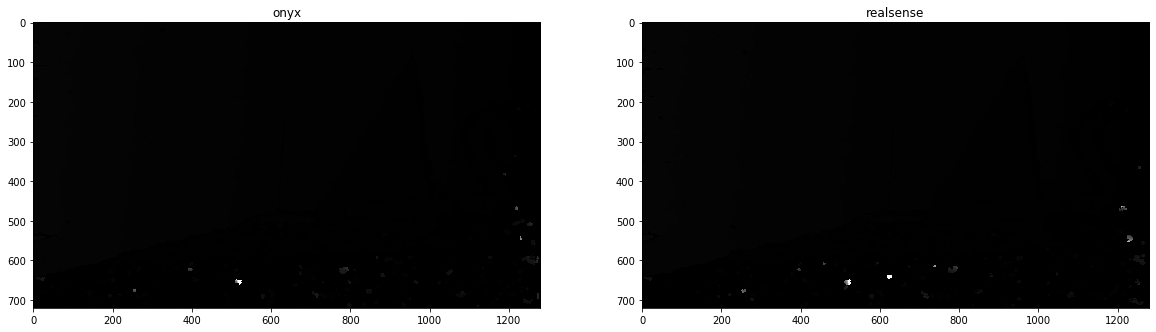

In [42]:
onyx_depth = cv2.imread('comparison_data/onyx_depth.png', cv2.IMREAD_ANYDEPTH).astype(np.float32)
rs_depth = cv2.imread('comparison_data/rs_depth.png', cv2.IMREAD_ANYDEPTH).astype(np.float32)

fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('onyx')
ax1.imshow(onyx_depth, cmap='gray')

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('realsense')
ax2.imshow(rs_depth, cmap='gray')

In [43]:
# Compute some image statistics:

onyx_mean = np.mean(onyx_depth.ravel())
onyx_std = np.std(onyx_depth.ravel())

print('ONYX: mean={}    std={}\n'.format(onyx_mean, onyx_std))

rs_mean = np.mean(rs_depth.ravel())
rs_std = np.std(rs_depth.ravel())

print('REALSENSE: mean={}    std={}\n'.format(rs_mean, rs_std))

ONYX: mean=572.8855590820312    std=951.015380859375

REALSENSE: mean=590.6437377929688    std=1252.6099853515625



Number of bins:  65536


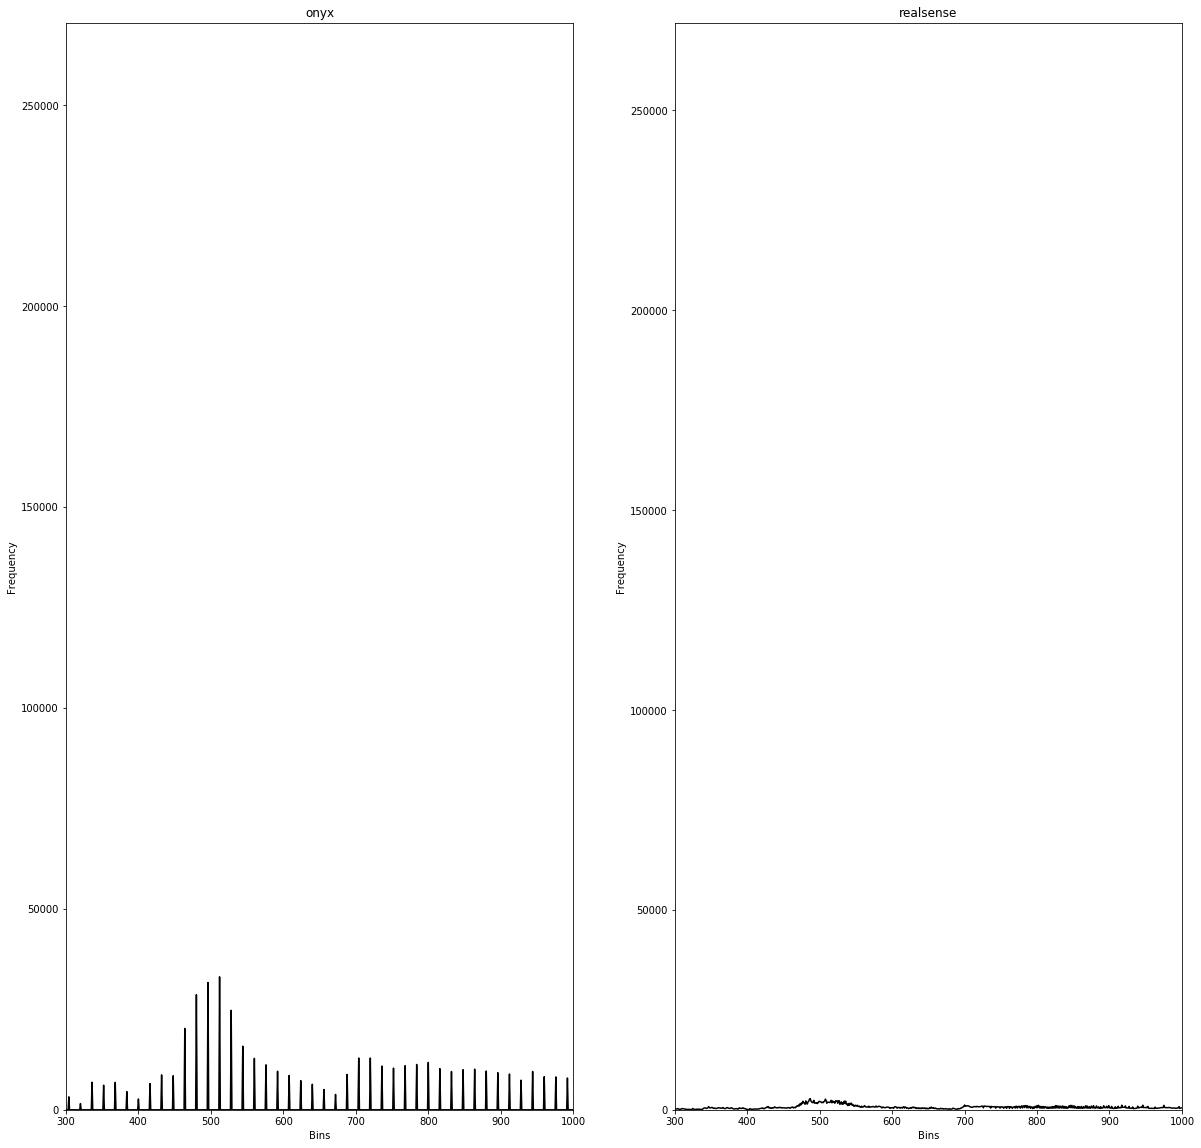

In [44]:
# Compute statistical distributions:

nbins = np.power(2, 16)
print('Number of bins: ', nbins)

onyx_hist, onyx_bins = np.histogram(onyx_depth.ravel(), nbins, [0, nbins])

rs_hist, rs_bins = np.histogram(rs_depth.ravel(), nbins, [0, nbins])

fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('onyx')
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Bins')
ax1.set_xlim([300, 1000])
ax1.set_ylim([0, np.max(onyx_hist)])
ax1.plot(onyx_hist, color='black')

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('realsense')
ax2.set_ylabel('Frequency')
ax2.set_xlabel('Bins')
ax2.set_xlim([300, 1000])
ax2.set_ylim([0, np.max(rs_hist)])
ax2.plot(rs_hist, color='black')

plt.savefig('histogram_comparison.png')

In [45]:
onyx_mean_hist = np.mean(onyx_hist)
onyx_std_hist = np.std(onyx_hist)

print('ONYX: mean={}    std={}\n'.format(onyx_mean_hist, onyx_std_hist))

rs_mean_hist = np.mean(rs_hist)
rs_std_hist = np.std(rs_hist)

print('REALSENSE: mean={}    std={}\n'.format(rs_mean_hist, rs_std_hist))

ONYX: mean=14.0625    std=1114.0677275281676

REALSENSE: mean=14.0625    std=1066.0268193891663



In [33]:
# Compare the distributions statistically:

assert(len(onyx_hist) == len(rs_hist))

kl_divergence = 0
for i in np.arange(0, len(onyx_hist)):
    p = onyx_hist[i]
    q = rs_hist[i]
    
    if q == 0:
        continue
    
    kl_divergence += p * np.log2(p / q) if p != 0 else 0
kl_divergence /= len(onyx_hist)
print('Similarity between distributions: {:.4}'.format(kl_divergence))

Similarity between distributions: 36.92


In [36]:
#Alternative
onyx_h = np.zeros(shape=(nbins))

onyx_flat = np.copy(onyx_depth.ravel())

print(onyx_flat.shape[0])
for i in np.arange(0, onyx_flat.shape[0]):
    onyx_h[int(onyx_flat[i])] += 1

921600


In [37]:
rs_h = np.zeros(shape=(nbins))

rs_flat = np.copy(rs_depth.ravel())

print(rs_flat.shape[0])
for i in np.arange(0, rs_flat.shape[0]):
    rs_h[int(rs_flat[i])] += 1

921600


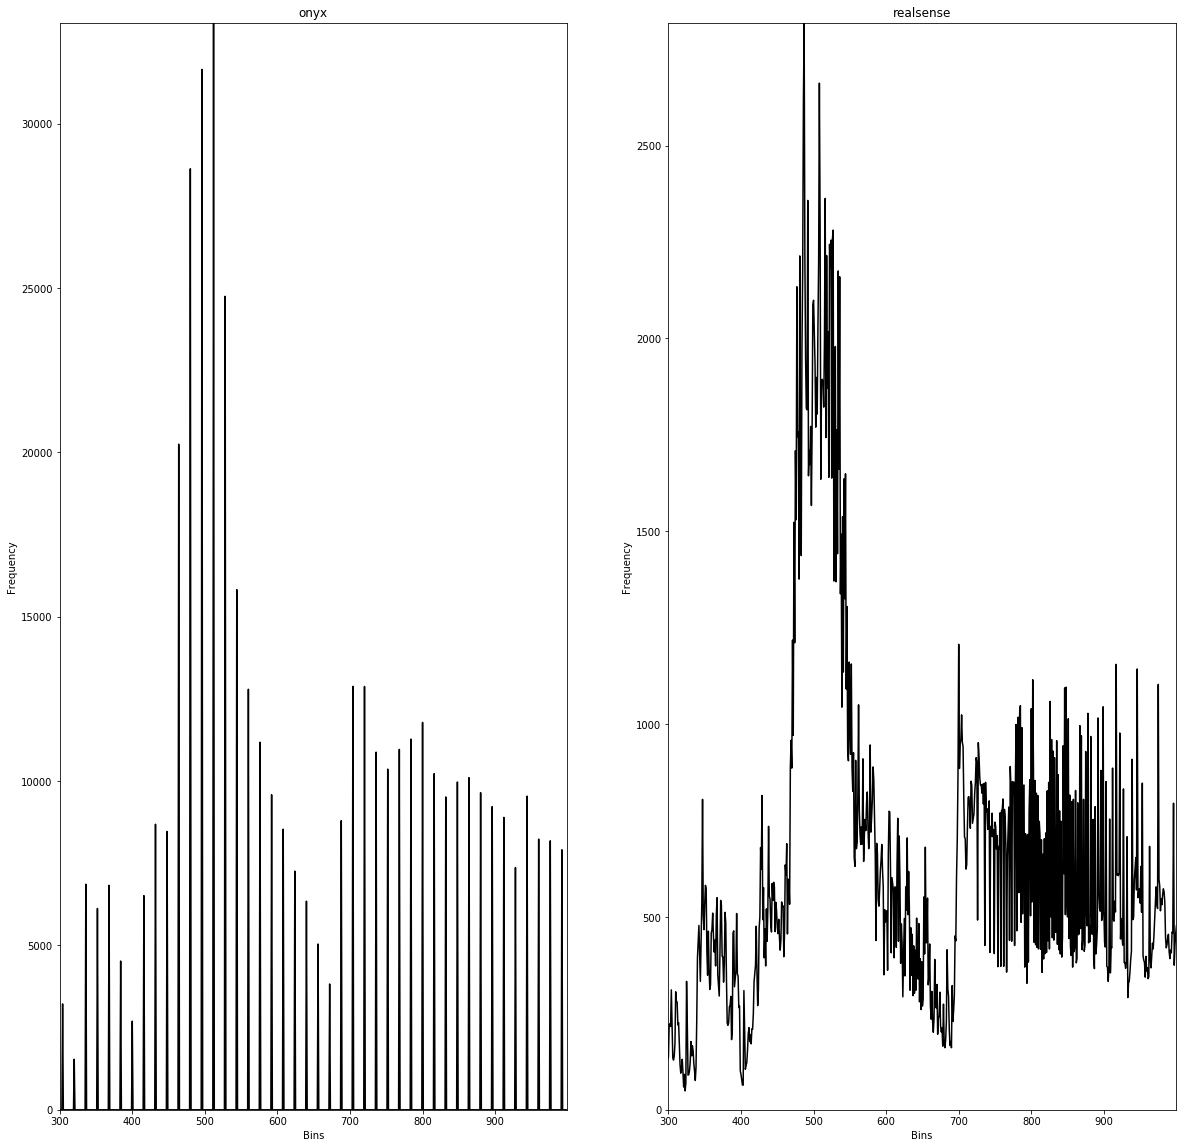

In [39]:
fig = plt.figure(figsize=(20, 20))

onyx_range = range(300, 1000)

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('onyx')
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Bins')
ax1.set_xlim([onyx_range[0], onyx_range[-1]])
ax1.set_ylim([0, np.max(onyx_h[onyx_range])])
ax1.plot(onyx_hist, color='black')

rs_range = range(300, 1000)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('realsense')
ax2.set_ylabel('Frequency')
ax2.set_xlabel('Bins')
ax2.set_xlim([rs_range[0], rs_range[-1]])
ax2.set_ylim([0, np.max(rs_h[rs_range])])
ax2.plot(rs_hist, color='black')

plt.savefig('histogram_comparison.png')